In [1]:
'''
First, define the environment. In this example, we are only using price data to initialize our state space
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    INSTRUMENT = "USD_JPY", 
    granularity = "M15", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
)

c:\users\sakiyama\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
'''
The Learning Agent -> DQN

Adjust hyperparameters and other model settings:
-> ./settings/DQNsettings
'''

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'C:\pleiades\xampp\htdocs\TradingTensors\data'

agent = DQNAgent(
    env= env,
    directory = PATH, #Path to save your models
)

'''And the agent is ready for training'''

'And the agent is ready for training'

# Train/Test Mode

<img src='./images/AgentEnv.JPG'/>

In [3]:
'''
Two things are happening under the hood to improve the stability of DQN:
- Experience Replay: Sampling transition tuples (s, a, r, s') with equal probability during SGD. Experiences can be reused
- Target Network: Freeze the Online Network to improve bootstrapping of TD-Target
'''

agent.train(
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 2,
    train_episodes = 5
)

End of Episode 1, Total Reward is 85.9, Average Reward is 1.023
Percentage of time spent on exploring (Random Action): 50 %
End of Episode 2, Total Reward is -68.9, Average Reward is -0.774
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 3, Total Reward is -36.2, Average Reward is -0.416
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1848_Episode3.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 4, Total Reward is -73.5, Average Reward is -0.865
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1848_Episode4.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 5, Total Reward is -77.4, Average Reward is -0.890
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1848_Episode5.ckpt is not in all_model_

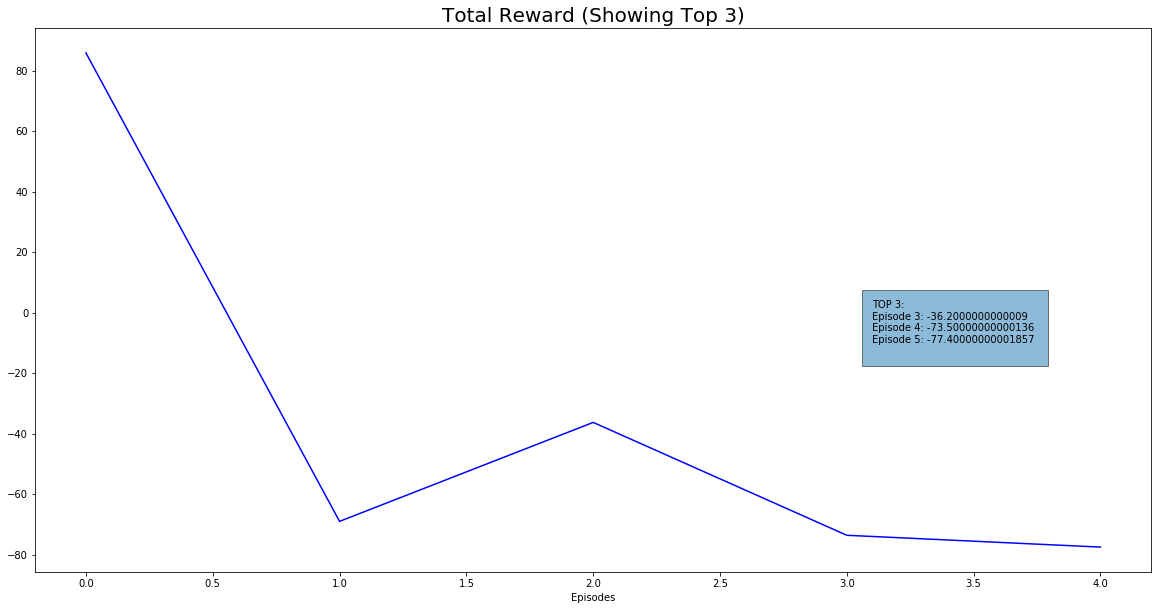

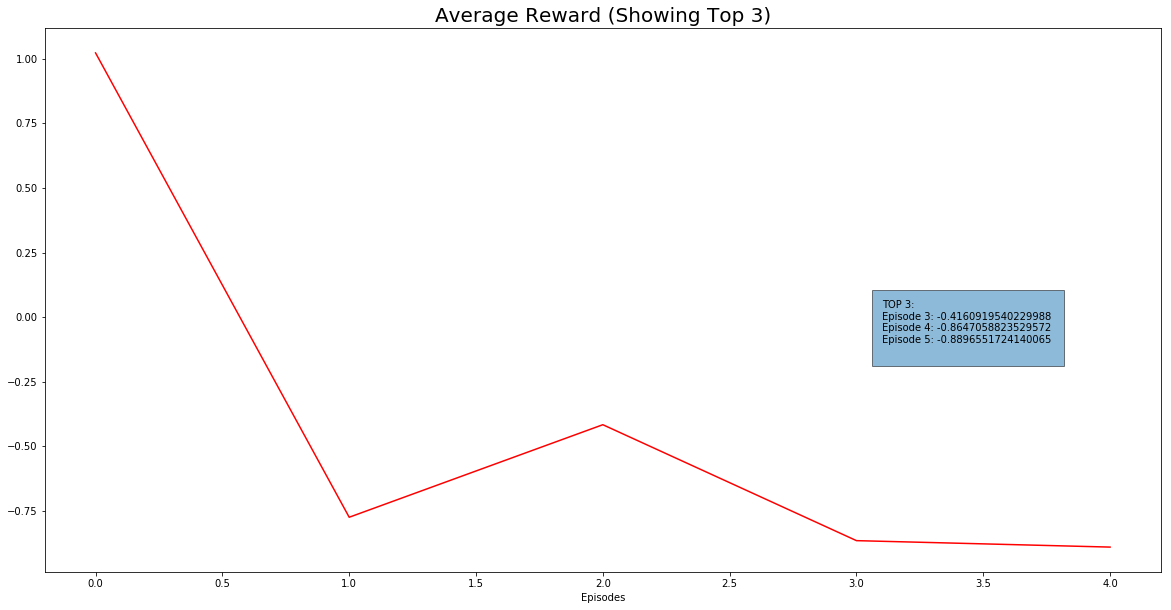

########   RANK 1   ###########
Episode          | 3
Total Reward     | -36.20
Average Reward   | -0.42
########   RANK 2   ###########
Episode          | 4
Total Reward     | -73.50
Average Reward   | -0.86
########   RANK 3   ###########
Episode          | 5
Total Reward     | -77.40
Average Reward   | -0.89


In [4]:
agent.trainSummary()

Summary Statistics for Episode 3 

Total Trades            | 87        (Buy)44       (Sell)43 
Profit (in pips)        | -36.20   (Buy)-36.90   (Sell)0.70
Win Ratio               | 37.93%    (Buy)34.09%   (Sell)41.86 %
Average Trade Duration  | 2.97


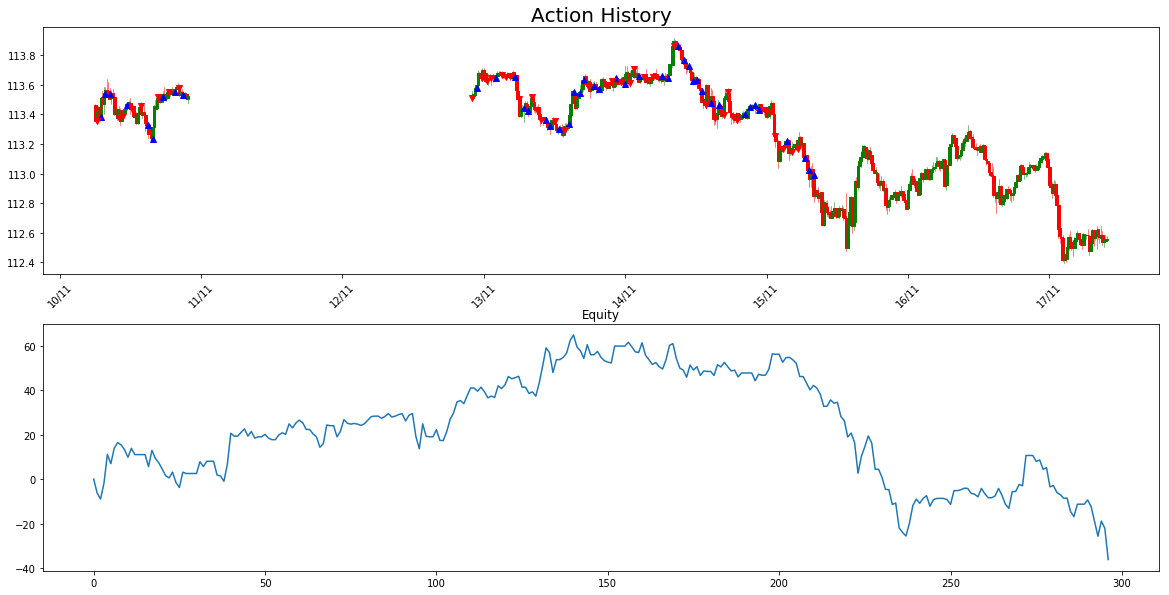

In [5]:
'''Pick a model from a particular episode and test the model on unseen data'''
BEST_EPISODE = 3
agent.episodeReview(BEST_EPISODE)

INFO:tensorflow:Restoring parameters from C:\pleiades\xampp\htdocs\TradingTensors\data\1848_Episode3.ckpt
Summary Statistics for Episode 0 

Total Trades            | 63        (Buy)23       (Sell)40 
Profit (in pips)        | 137.50   (Buy)59.50   (Sell)78.00
Win Ratio               | 65.08%    (Buy)73.91%   (Sell)60.00 %
Average Trade Duration  | 3.00


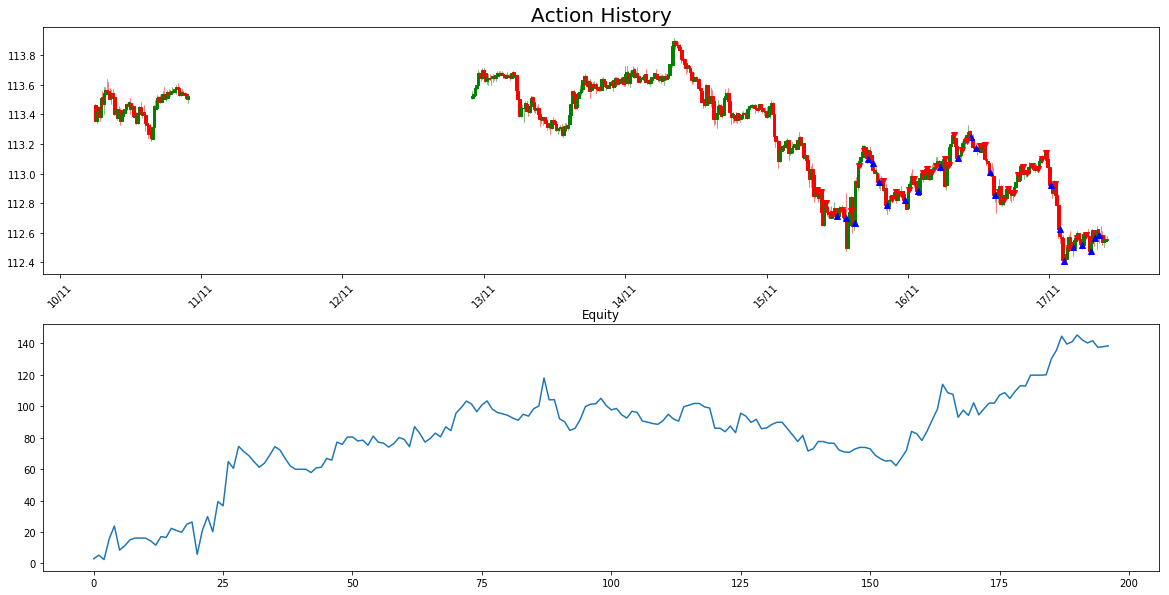

In [6]:
'''Testing!'''

agent.test(BEST_EPISODE)

# Live Trading

When you feel ready, pick this model and go live!

In [7]:
'''
Under the hood:
2 threads running, one to 'listen' to new candle events, and another to process the new candle and execute trade
Note: Normalize new data set with train_set mean and std


agent.liveTrading(
    MODEL_EPS = 45 #Select the Model # (Training episode)
)
'''

"\nUnder the hood:\n2 threads running, one to 'listen' to new candle events, and another to process the new candle and execute trade\nNote: Normalize new data set with train_set mean and std\n\n\nagent.liveTrading(\n    MODEL_EPS = 45 #Select the Model # (Training episode)\n)\n"

In [8]:
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    INSTRUMENT = "EUR_USD", 
    TIMEFRAME = "H1", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
)

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'C:\Users\Henry\Documents\Python Stuff\Upwork Trial\Forex Ai\github\MODELS'

agent = DQNAgent(
    env= env,
    PARENT_PATH = PATH, #Path to save your models
    hidden_layers=[128, 64, 32]
)
agent.train(
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 30,
    train_episodes = 200
)

agent.trainSummary()
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 348-349: truncated \UXXXXXXXX escape (<ipython-input-8-337ca6139814>, line 28)